In [22]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
cityPlusRides_df = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

# Display the data table for preview
cityPlusRides_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [ ]:
#cityPlusRides_df.dtypes

Find:
Average Fare ($) Per City,
Total Number of Rides Per City,
Total Number of Drivers Per City,
City Type (Urban, Suburban, Rural)


## Bubble Plot of Ride Sharing Data

In [43]:
urban_cities=cityPlusRides_df[cityPlusRides_df["type"]=="Urban"]
rural_cities=cityPlusRides_df[cityPlusRides_df["type"]=="Rural"]
suburban_cities=cityPlusRides_df[cityPlusRides_df["type"]=="Suburban"]
#suburban_city
#urban_city
#urban_city

In [59]:
urban_rides = urban_cities.groupby(["city"]).count()["ride_id"]
suburban_rides = suburban_cities.groupby(["city"]).count()["ride_id"]
rural_rides = rural_cities.groupby(["city"]).count()["ride_id"]
#urban_rides

In [60]:
avg_urban_fare=urban_cities.groupby(["city"]).mean()["fare"]
avg_suburban_fare=suburban_cities.groupby(["city"]).mean()["fare"]
avg_rural_fare=rural_cities.groupby(["city"]).mean()["fare"]
#avg_urban_fare

In [119]:
urban_drivers = urban_cities.groupby(["city"]).count()["driver_count"]
suburban_drivers = suburban_cities.groupby(["city"]).count()["driver_count"]
rural_drivers = rural_cities.groupby(["city"]).count()["driver_count"]
#urban_drivers

In [120]:
label_font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

axis_font= {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 10,
        }

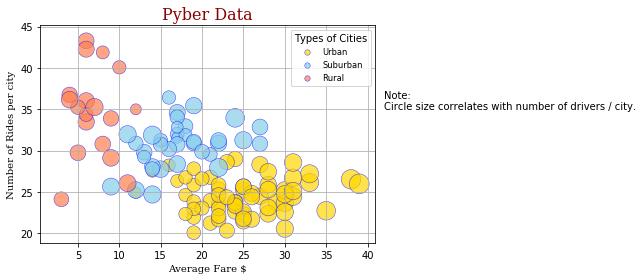

In [175]:
#You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.

plt.scatter(urban_rides,avg_urban_fare,c='gold',s=10*urban_drivers, marker='o', edgecolor='blue',
            alpha=0.7, linewidth= 0.5, label="Urban"
)

plt.scatter(suburban_rides,avg_suburban_fare,c='skyblue',s=10*urban_drivers, marker='o', edgecolor='blue',
            alpha=0.7, linewidth= 0.5,label="Suburban"
)

plt.scatter(rural_rides,avg_rural_fare,c='coral',s=10*urban_drivers, marker='o', edgecolor='blue',
            alpha=0.7, linewidth= 0.5,label="Rural"
)




plt.title("Pyber Data", fontdict=label_font, loc='center')
plt.xlabel("Average Fare $",fontdict=axis_font)
plt.ylabel("Number of Rides per city",fontdict=axis_font)
plt.grid(True)

plt.text(42, 35, "Note:\nCircle size correlates with number of drivers / city.")

lgnd = plt.legend(fontsize="small",  
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="Types of Cities")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.savefig("Pyber_Data.png")
plt.show()

## Total Fares by City Type

In [177]:
type_percents = 100 * city_ride_data.groupby(["type"]).sum()["fare"] / city_ride_data["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

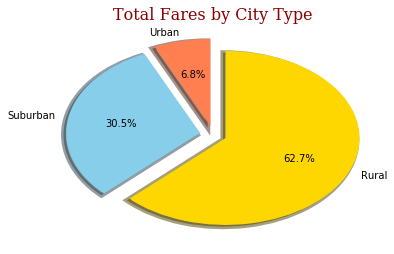

In [178]:
# Build Pie Chart
plt.pie(type_percents, explode=[0.1, 0.1, 0.1], labels=["Urban", "Suburban", "Rural"], 
        colors=["coral", "skyblue", "gold"], labeldistance=1.1,  autopct='%1.1f%%',
        shadow=True, startangle=90, wedgeprops={'linewidth': 5}, center=(0,0))

plt.title("Total Fares by City Type", fontdict=font)

plt.savefig("Total_Fares_by_City_Type.png")
plt.show()


## Total Rides by City Type

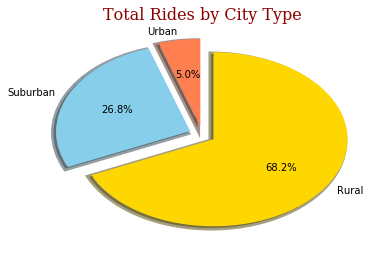

In [185]:
# Calculate Ride Percents
rides_percents = 100 * cityPlusRides_df.groupby(["type"]).sum()["ride_id"] / cityPlusRides_df["ride_id"].sum()
rides_percents
# Build Pie Chart
plt.pie(rides_percents, explode=[0.1, 0.1, 0.1], labels=["Urban", "Suburban", "Rural"], 
        colors=["coral", "skyblue", "gold"], labeldistance=1.1,  autopct='%1.1f%%',
        shadow=True, startangle=90, wedgeprops={'linewidth': 5}, center=(0,0))

plt.title("Total Rides by City Type", fontdict=font)

plt.savefig("Total_Rides_by_City_Type.png")
plt.show()

## Total Drivers by City Type

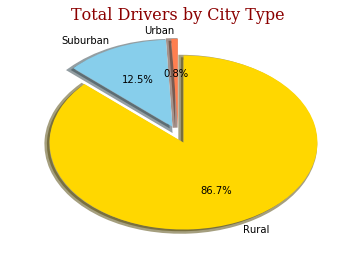

In [190]:
# Calculate Driver Percents
drivers_percents = 100 * cityPlusRides_df.groupby(["type"]).sum()["driver_count"] / cityPlusRides_df["driver_count"].sum()

# Build Pie Chart
plt.pie(drivers_percents, explode=[0.1, 0.1, 0.1], labels=["Urban", "Suburban", "Rural"], 
        colors=["coral", "skyblue", "gold"], labeldistance=1.1,  autopct='%1.1f%%',
        shadow=True, startangle=90, wedgeprops={'linewidth': 5}, center=(0,0))

plt.title("Total Drivers by City Type", fontdict=font)

plt.savefig("Total_Drivers_by_City_Type.png")
plt.show()